In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve ##Import any other libraries you may need

In [2]:
performances = pd.read_csv('performances.csv')

In [3]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


In [16]:
def plot_auc(t_y, p_y):

    ## YOUR CODE HERE
    ## Note you can utilize roc_curve and auc imported above
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    
def plot_pr(t_y, p_y):

    ## YOUR CODE HERE
    ## Note you can utilize precision_recall_curve imported above
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    plt.plot(recall, precision, color='red', lw=2)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('Precision-Recall Curve')

def calc_f1(prec,recall):

    return 2*(prec*recall)/(prec+recall)


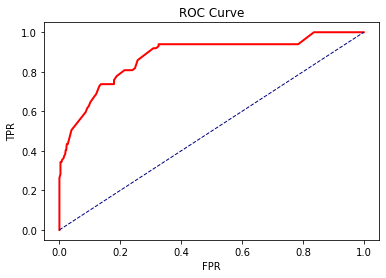

In [17]:
plot_auc(performances['ground_truth'],performances['probability'])

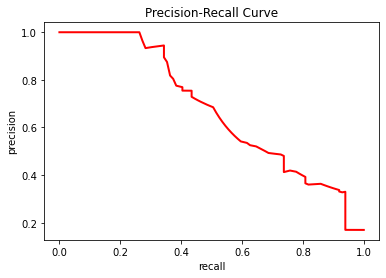

In [18]:
plot_pr(performances['ground_truth'],performances['probability'])

Calculate F1 score for two different scenarios here, one where you choose a threshold that favors precision, and one with a threshold that favors recall: 

Text(0.5, 1.0, 'Precision/Recall by threshold')

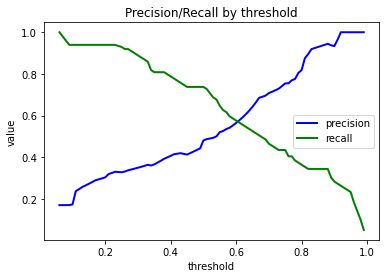

In [27]:
precision, recall, thresholds = precision_recall_curve(performances['ground_truth'],performances['probability'], pos_label=1)
plt.plot(thresholds, precision[:-1], color='blue', lw=2, label='precision')
plt.plot(thresholds, recall[:-1], color='green', lw=2, label='recall')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('value')
plt.title('Precision/Recall by threshold')


In [45]:
recall[17]

0.9393939393939394

In [47]:
### YOUR CODE HERE

# favor precision
favor_precision_ind = -13
t = thresholds[favor_precision_ind]
p = precision[favor_precision_ind]
r = recall[favor_precision_ind]
print(f'Favor precision: t={t}, precision={p:.2f}, recall={r:.2f}, F1={calc_f1(p,r):.2f}')

# favor recall
favor_recall_ind = 17
t = thresholds[favor_recall_ind]
p = precision[favor_recall_ind]
r = recall[favor_recall_ind]
print(f'Favor recall: t={t}, precision={p:.2f}, recall={r:.2f}, F1={calc_f1(p,r):.2f}')

Favor precision: t=0.83, precision=0.94, recall=0.34, F1=0.50
Favor recall: t=0.23, precision=0.33, recall=0.94, F1=0.49


Now look at what the _accuracy_ of our model would be using those two threshold values. Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.

Think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [49]:
### YOUR CODE HERE 
performances['pred_favor_precision'] = performances.apply(lambda x: int(x['probability'] > thresholds[favor_precision_ind]), axis=1)
performances['pred_favor_recall'] = performances.apply(lambda x: int(x['probability'] > thresholds[favor_recall_ind]), axis=1)

In [50]:
performances

,ground_truth,probability,pred_favor_precision,pred_favor_recall
0,1,0.99,1,1
1,1,0.98,1,1
2,1,0.97,1,1
3,1,0.96,1,1
4,1,0.95,1,1
...,...,...,...,...
674,0,0.12,0,0
675,0,0.90,1,1
676,0,0.91,1,1
677,0,0.78,0,1


In [51]:
from sklearn.metrics import accuracy_score
acc_favor_precision = accuracy_score(performances['ground_truth'], performances['pred_favor_precision'])
acc_favor_recall = accuracy_score(performances['ground_truth'], performances['pred_favor_recall'])
print(f'Accuracy favor precision: {acc_favor_precision:.2f}, favor recall: {acc_favor_recall:.2f}')

Accuracy favor precision: 0.90, favor recall: 0.71
